Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

#### Описание услуг: 
Оператор предоставляет два основных типа услуг: 

- Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
- Интернет: Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).  

Также доступны дополнительные услуги услуги:

- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).


За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

#### Описание данных:
Данные состоят из файлов, полученных из разных источников:

- contract.csv — информация о договоре;
- personal.csv — персональные данные клиента;
- internet.csv — информация об интернет-услугах;
- phone.csv — информация об услугах телефонии.

#### Описание полей данных:
- BeginDate – дата начала пользования услугами.
- EndDate – дата окончания пользования услугами.
- Type – тип оплаты: ежемесячный, годовой, двухгодовой.
- PaperlessBilling – безналичный расчет.
- PaymentMethod – способ оплаты.
- MonthlyCharges – ежемесячные траты на услуги.
- TotalCharges – всего потрачено денег на услуги.
- Dependents – наличие иждивенцев.
- Senior Citizen – наличие пенсионного статуса по возрасту.
- Partner – наличие супруга(и).
- MultipleLines – наличие возможности ведения параллельных линий во время звонка.

Во всех файлах столбец customerID содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.

#### План работы:

- Изучение полученных данных.
- Предобработка данных.
- Исследовательский анализ данных.
- Подготовка данных к расчету модели.
- Моделирование.
- Тестирование моделей.
- Общий вывод.
- Отчет.

**Шаг 1: Загрузка и  первичный анализ данных:**

In [130]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [131]:
# Импортируем данные о договорах
try:
    contract = pd.read_csv('/datasets/final_provider/contract.csv') 
except:
    print('Ошибка. Проверьте правильность пути к данным о контактах')

In [132]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [133]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [134]:
contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [135]:
#Посмортим на процент пропусков
pd.DataFrame(round((contract.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
customerID,0.000000
BeginDate,0.000000
EndDate,0.000000
Type,0.000000
PaperlessBilling,0.000000
PaymentMethod,0.000000
MonthlyCharges,0.000000
TotalCharges,0.000000


In [136]:
contract.duplicated().value_counts()

False    7043
dtype: int64

Пропусков и дубликатов в данных о договорах нет. Столбцы о платежах содержат разные типы данных, скорее всего в дальнейшем их нужно привести к одному типу.

In [137]:
# Импортируем данные о клиентах
try:
    personal = pd.read_csv('/datasets/final_provider/personal.csv') 
except:
    print('Ошибка. Проверьте правильность пути к данным о пользователях')

In [138]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [139]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [140]:
#Посмортим на процент пропусков
pd.DataFrame(round((personal.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000


In [141]:
personal.duplicated().value_counts()

False    7043
dtype: int64

В данных о клиентах пропусков и дубликатов так-же нет. Типы данних соответствуют содержанию.

In [142]:
# Импортируем данные об интернет-услугах
try:
    internet = pd.read_csv('/datasets/final_provider/internet.csv') 
except:
    print('Ошибка. Проверьте правильность пути к данным об итернет услугах')

In [143]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [144]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [145]:
#Посмортим на процент пропусков
pd.DataFrame(round((internet.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
customerID,0.000000
InternetService,0.000000
OnlineSecurity,0.000000
OnlineBackup,0.000000
DeviceProtection,0.000000
TechSupport,0.000000
StreamingTV,0.000000
StreamingMovies,0.000000


In [146]:
internet.duplicated().value_counts()

False    5517
dtype: int64

В таблище с данными об интернет-услугах меньше записей, чем в предыдуших. Скорее-всего это связано с тем, что не все клиенты пользуются данными услугами. Пропусков и дубликатов в данных нет.

In [147]:
# Импортируем данные об услугах телефонии
try:
    phone = pd.read_csv('/datasets/final_provider/phone.csv') 
except:
    print('Ошибка. Проверьте правильность пути к данным об услугах телефонии')

In [148]:
#Посмортим на процент пропусков
pd.DataFrame(round((phone.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
customerID,0.000000
MultipleLines,0.000000


In [149]:
phone.duplicated().value_counts()

False    6361
dtype: int64

В таблице с данными об услугах телефонии так же меньше записей. Причины, скорее всего, те же. Пропусков и дубликатов в данных нет.

**Вывод:**  Были загружены данные из всех четырех таблиц. Т.к. пропусков и дубликатов данных нет, то мы можем считать, что все customerID являются уникальными и объединим таблицы по данному столбцу для дальнейшего исследования.

**Шаг 2: Предобработка данныx:**

Объединим все таблицы в одну:

In [150]:
df_all = contract.merge(personal, how='left', on='customerID')
df_all = df_all.merge(internet, how='left', on='customerID')
df_all = df_all.merge(phone, how='left', on='customerID')

In [151]:
df_all.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [152]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


Переведем даты в более удобный для дальнейшей работы формат:

In [153]:
df_all['EndDate1']= df_all['EndDate'].replace('No', '2020-02-01')
df_all['BeginDate']= pd.to_datetime(df_all['BeginDate'], format='%Y-%m-%d')
df_all['EndDate']= pd.to_datetime(df_all['EndDate'], format='%Y-%m-%dT%H:%M:%S',errors='coerce')

#у клиентов, которые с нами меньше месяса, столбец TotalCharges пуст. Заполним его суммой за месяц.
df_all.loc[df_all['TotalCharges'] == ' ', 'TotalCharges'] = df_all['MonthlyCharges']
df_all['TotalCharges'] = df_all['TotalCharges'].astype('float')

#вспомогательные столбцы для вычислений, ниже удалим
df_all['begin_year'] = pd.DatetimeIndex(df_all['BeginDate']).year
df_all['end_year'] = pd.DatetimeIndex(df_all['EndDate1']).year
df_all['begin_month'] = pd.DatetimeIndex(df_all['BeginDate']).month
df_all['end_month'] = pd.DatetimeIndex(df_all['EndDate1']).month

#добавляем признак Months: сколько полных месяцев клиент с нами
df_all['Months'] = ((df_all['end_year']- df_all['begin_year']) * 12 + (df_all['end_month'] - df_all['begin_month']))

In [154]:
#удалим времнный столбцы
df_all = df_all.drop(['begin_year','end_year','begin_month','end_month', 'EndDate1'], axis=1)

In [155]:
df_all.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Months
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,DSL,No,Yes,No,No,No,No,NaN,1
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,34
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,2
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,NaN,45
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,2
5,9305-CDSKC,2019-03-01,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.50,Female,0,...,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,8
6,1452-KIOVK,2018-04-01,NaT,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Male,0,...,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,22
7,6713-OKOMC,2019-04-01,NaT,Month-to-month,No,Mailed check,29.75,301.90,Female,0,...,No,DSL,Yes,No,No,No,No,No,NaN,10
8,7892-POOKP,2017-07-01,2019-11-01,Month-to-month,Yes,Electronic check,104.80,3046.05,Female,0,...,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,28
9,6388-TABGU,2014-12-01,NaT,One year,No,Bank transfer (automatic),56.15,3487.95,Male,0,...,Yes,DSL,Yes,Yes,No,No,No,No,No,62


Т.к. количество записей в таблицах неодинаково. И, скорее всего, данные пропуски значат, что услуга пользователю не оказывалась. То заменим пропуски на No.

In [156]:
#df_all['MultipleLines'].fillna('No',inplace = True)
df_all['InternetService'].fillna('No',inplace = True)
df_all['OnlineSecurity'].fillna('No',inplace = True)
df_all['OnlineBackup'].fillna('No',inplace = True)
df_all['DeviceProtection'].fillna('No',inplace = True)
df_all['TechSupport'].fillna('No',inplace = True)
df_all['StreamingTV'].fillna('No',inplace = True)
df_all['StreamingMovies'].fillna('No',inplace = True)

In [157]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

In [158]:
#Заменим пропуски в столбце EndDate
df_all['EndDate'].fillna('proceed',inplace = True)

Создадим новый столбец с булевыми значениями: 1 - клиент ушёл, 0 - остался

In [159]:
df_all['Out'] = (df_all['EndDate'] != 'proceed')*1

**Вывод:**  Данные были объединены в одну таблицу, заполнены пропуски, приведены к нужным типам.  Добавлен столбец, описывающий ушёл клиент или нет. Данные готовы к исследовательскому анализу.

**Шаг 3: Исследовательский анализ данных:**

Посмотрим на распределение новых пользователей по годам и на продолжительности контрактов пользователей, которые ушли.

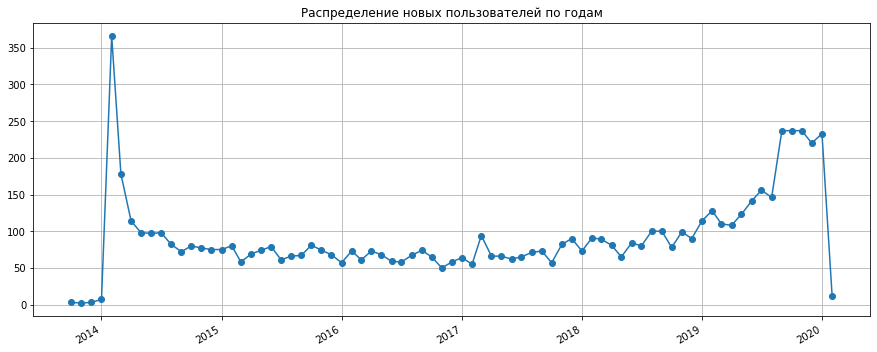

In [160]:
df_all['BeginDate'].value_counts().plot(style='o-', grid=True,figsize=(15, 6))
plt.title("Распределение новых пользователей по годам")
plt.show()

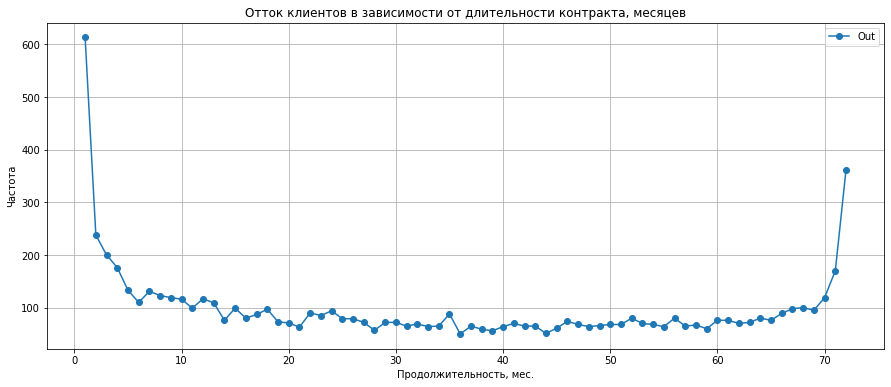

In [161]:
df_all.pivot_table(values = 'Out', index ='Months', aggfunc='count').query('Months > 0').plot(style='o-', grid=True,figsize=(15, 6))
plt.title("Отток клиентов в зависимости от длительности контракта, месяцев")
plt.xlabel('Продолжительность, мес.')
plt.ylabel('Частота')
plt.show()

**Вывод:** Из графиков видно, что основной приток новых пользователей пришёлся на 2014 год. А также наблюдается увеличение количества новых пользователей начиная с 2019 года. Возможно, это связано с проведением более агрессивной рекламной компании в данные периоды. Кроме того, по графику оттока клиентов, видно, что они чаше уходям в первые месяцы действия контрактов.

Посмотрим на распределение пользователей по типу оплаты.

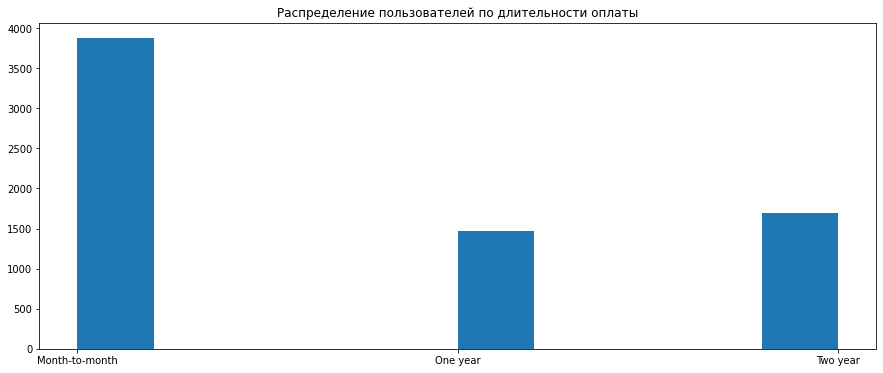

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64


In [162]:
plt.figure(figsize=(15,6))
plt.title('Распределение пользователей по длительности оплаты')
plt.hist(df_all['Type'])
plt.show()
print(df_all['Type'].value_counts())

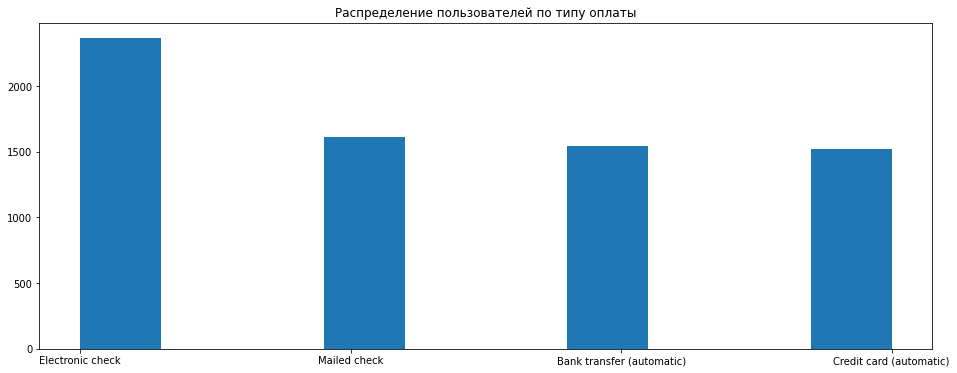

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [163]:
plt.figure(figsize=(16,6))
plt.title('Распределение пользователей по типу оплаты')
plt.hist(df_all['PaymentMethod'])
plt.show()
print(df_all['PaymentMethod'].value_counts())

**Вывод:** Большинство пользователей предпочитают помесячную оплаты с помощью электронных чеков.

In [164]:
#создадим  дополнительную таблицу с данными об ушедших клиентах
df_out = df_all[df_all['EndDate'] != 'proceed']
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        1869 non-null   object        
 1   BeginDate         1869 non-null   datetime64[ns]
 2   EndDate           1869 non-null   object        
 3   Type              1869 non-null   object        
 4   PaperlessBilling  1869 non-null   object        
 5   PaymentMethod     1869 non-null   object        
 6   MonthlyCharges    1869 non-null   float64       
 7   TotalCharges      1869 non-null   float64       
 8   gender            1869 non-null   object        
 9   SeniorCitizen     1869 non-null   int64         
 10  Partner           1869 non-null   object        
 11  Dependents        1869 non-null   object        
 12  InternetService   1869 non-null   object        
 13  OnlineSecurity    1869 non-null   object        
 14  OnlineBackup      1869 n

Построим гистограммы распределения величин ежемесячных платежей.

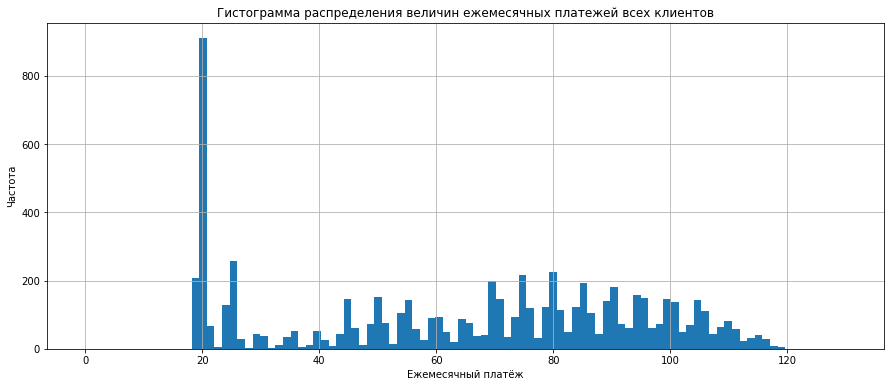

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


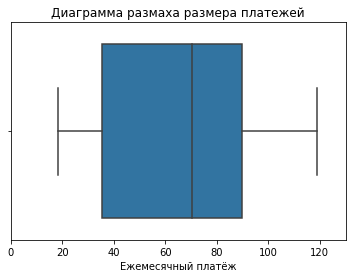

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [165]:
df_all.plot(y = 'MonthlyCharges', kind = 'hist', bins = 100, grid=True, figsize = (15,6), range = (0,130), legend=None)
plt.title('Гистограмма распределения величин ежемесячных платежей всех клиентов')
plt.xlabel('Ежемесячный платёж')
plt.ylabel('Частота')
plt.show()
sns.boxplot(df_all['MonthlyCharges'])
plt.title('Диаграмма размаха размера платежей')
plt.xlabel('Ежемесячный платёж')
plt.xlim(0, 130)
plt.show()
df_all['MonthlyCharges'].describe()

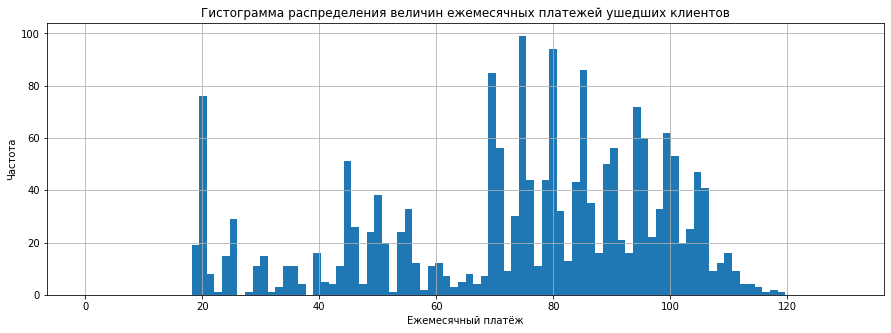

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


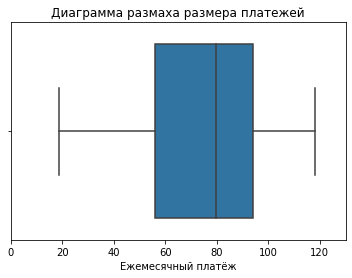

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

In [166]:
df_out.plot(y = 'MonthlyCharges', kind = 'hist', bins = 100, grid=True, figsize = (15,5), range = (0,130), legend=None)
plt.title('Гистограмма распределения величин ежемесячных платежей ушедших клиентов')
plt.xlabel('Ежемесячный платёж')
plt.ylabel('Частота')
plt.show()
sns.boxplot(df_out['MonthlyCharges'])
plt.title('Диаграмма размаха размера платежей')
plt.xlabel('Ежемесячный платёж')
plt.xlim(0, 130)
plt.show()
df_out['MonthlyCharges'].describe()

**Вывод:**  По графикам видно, что ушедшие в среднем платили больше, чем те кто остались. Это-же подтверждают и статистика  для каждой группы: средние и медианы. Возможно клиенты как раз и уходили из-за недовольства размером оплаты услуг.

Посмотрим на распределение пользования телефоном и интернетом

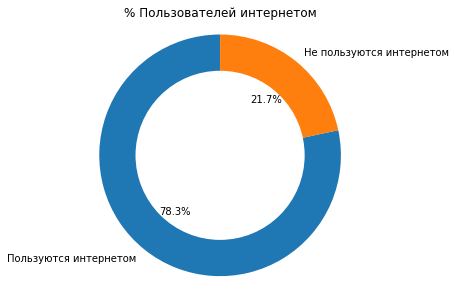

In [167]:
non_internet_users = (df_all['InternetService'] == 'No').sum()
total_all = len(df_all)
labels = ['Пользуются интернетом', 'Не пользуются интернетом']
x = [1-non_internet_users/total_all, non_internet_users/total_all]
fig1, ax1 = plt.subplots()
ax1.pie(x, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title('% Пользователей интернетом')
plt.show()

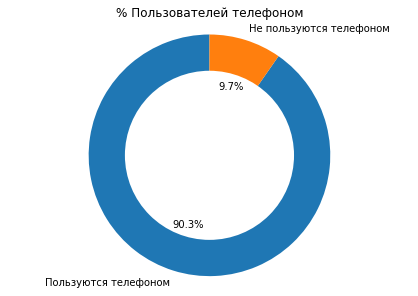

In [168]:
non_phone_users = df_all['MultipleLines'].isna().sum()
labels = ['Пользуются телефоном', 'Не пользуются телефоном']
x = [1-non_phone_users/total_all, non_phone_users/total_all]
fig1, ax1 = plt.subplots()
ax1.pie(x, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title('% Пользователей телефоном')
plt.show()

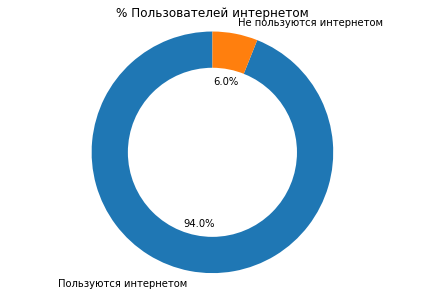

In [169]:
non_internet_users_out = (df_out['InternetService'] == 'No').sum()
total_all = len(df_out)
labels = ['Пользуются интернетом', 'Не пользуются интернетом']
x = [1-non_internet_users_out/total_all, non_internet_users_out/total_all]
fig1, ax1 = plt.subplots()
ax1.pie(x, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title('% Пользователей интернетом')
plt.show()

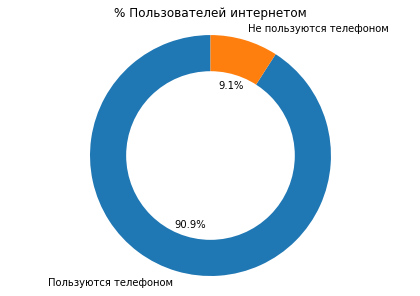

In [170]:
non_phone_users_out = df_out['MultipleLines'].isna().sum()
labels = ['Пользуются телефоном', 'Не пользуются телефоном']
x = [1-non_phone_users_out/total_all, non_phone_users_out/total_all]
fig1, ax1 = plt.subplots()
ax1.pie(x, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title('% Пользователей интернетом')
plt.show()

**Вывод:** Доля пользователей интернета среди тех кто ушел гораздо выше. Можно сделать предположения, что их не устраивает качество именно этой услуги. Процент тех, кто пользуется телефона в обоих группах примерно одинаков. 

In [171]:
df_all['MultipleLines'].fillna('No',inplace = True)

Посмотрим, есть ли различия по гендернаму признаку

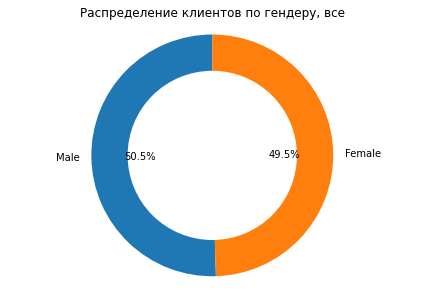

In [172]:
labels = ['Male', 'Female']
sizes = df_all['gender'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title("Распределение клиентов по гендеру, все")
plt.show()
plt.show()

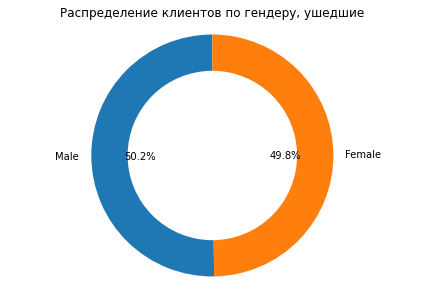

In [173]:
labels = ['Male', 'Female']
sizes = df_all.query('Out == 1')['gender'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title("Распределение клиентов по гендеру, ушедшие")
plt.show()
plt.show()

**Вывод:** Различий по гендерному признаку между группами почти нет. Более того в процент мужчины и женщины в обоих группах почти одинаков.

**Шаг 4: Подготовка данных к расчету модели**

In [174]:
#Для удобства переименуем датасет
df = df_all

In [175]:
#Заменим значения Yes No на булевые(1,0)
df['MultipleLines'] = pd.Series(np.where(df['MultipleLines'].values == 'Yes', 1, 0),df.index)
df['Dependents'] = pd.Series(np.where(df['Dependents'].values == 'Yes', 1, 0),df.index)
df['Partner'] = pd.Series(np.where(df['Partner'].values == 'Yes', 1, 0),df.index)
df['gender'] = pd.Series(np.where(df['gender'].values == 'Female', 1, 0),df.index)
df['StreamingMovies'] = pd.Series(np.where(df['StreamingMovies'].values == 'Yes', 1, 0),df.index)
df['StreamingTV'] = pd.Series(np.where(df['StreamingTV'].values == 'Yes', 1, 0),df.index)
df['TechSupport'] = pd.Series(np.where(df['TechSupport'].values == 'Yes', 1, 0),df.index)
df['DeviceProtection'] = pd.Series(np.where(df['DeviceProtection'].values == 'Yes', 1, 0),df.index)
df['OnlineBackup'] = pd.Series(np.where(df['OnlineBackup'].values == 'Yes', 1, 0),df.index)
df['OnlineSecurity'] = pd.Series(np.where(df['OnlineSecurity'].values == 'Yes', 1, 0),df.index)
df['PaperlessBilling'] = pd.Series(np.where(df['PaperlessBilling'].values == 'Yes',1,0),df.index)

In [176]:
#Категориальные переменные закодируем техникой OneHotEncoder
df = pd.get_dummies(df, columns = ['Type', 'InternetService','PaymentMethod'], drop_first = True)

Заменим значения 'proceed' в столбце 'EndDate' на дату выгрузки базы. Чтобы в дальнейшем можно было вычислить продолжительность пользования для каждого клиента.

In [177]:
df['EndDate'] = df['EndDate'].replace('proceed', '2020-02-01')

In [178]:
df['lasted'] = (pd.to_datetime(df['EndDate']) - df['BeginDate']).dt.days

In [179]:
df.rename({'lasted': 'duration'}, axis=1, inplace=True)

Удалим те столбцы, которые могут привести к переобучению моделей.

In [180]:
df = df.drop(['customerID', 'EndDate', 'BeginDate', 'MonthlyCharges', 'PaperlessBilling'], axis=1)

In [181]:
df.head(10)

,TotalCharges,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Months,Out,Type_One year,Type_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,duration
0,29.85,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,31
1,1889.50,0,0,0,0,1,0,1,0,0,...,34,0,1,0,0,0,0,0,1,1036
2,108.15,0,0,0,0,1,1,0,0,0,...,2,1,0,0,0,0,0,0,1,61
3,1840.75,0,0,0,0,1,0,1,1,0,...,45,0,1,0,0,0,0,0,0,1371
4,151.65,1,0,0,0,0,0,0,0,0,...,2,1,0,0,1,0,0,1,0,61
5,820.50,1,0,0,0,0,0,1,0,1,...,8,1,0,0,1,0,0,1,0,245
6,1949.40,0,0,0,1,0,1,0,0,1,...,22,0,0,0,1,0,1,0,0,671
7,301.90,1,0,0,0,1,0,0,0,0,...,10,0,0,0,0,0,0,0,1,306
8,3046.05,1,0,1,0,0,0,1,1,1,...,28,1,0,0,1,0,0,1,0,853
9,3487.95,0,0,0,1,1,1,0,0,0,...,62,0,1,0,0,0,0,0,0,1888


Определим признаки и целевой признак

In [182]:
features = df.drop('Out', axis=1)
target = df['Out']

In [183]:
features_train, features_rest, target_train, target_rest = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_rest, target_rest, test_size=0.5, random_state=12345)

In [184]:
#посмотрим на размер выборок
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(4225, 21)
(1409, 21)
(1409, 21)


**Шаг 4: Обучение моделей**

LogisticRegression

In [185]:
model_lr = LogisticRegression(class_weight = 'balanced', random_state=12345)
model_lr.fit(features_train, target_train)
predicted_valid_lr = pd.Series(model_lr.predict(features_valid))
accuracy = accuracy_score(target_valid, predicted_valid_lr)
probabilities_valid = model_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("| " "accuracy:", accuracy, "| " "AUC-ROC:", roc_auc)

| accuracy: 0.7622427253371186 | AUC-ROC: 0.8487257655857299


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier

In [186]:
model_dt = DecisionTreeClassifier(class_weight = 'balanced', random_state=12345)
model_dt.fit(features_train, target_train)
predicted_valid_dt = pd.Series(model_dt.predict(features_valid))
accuracy = accuracy_score(target_valid, predicted_valid_dt)
probabilities_valid = model_dt.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("| " "accuracy:", accuracy, "| " "AUC-ROC:", roc_auc)

| accuracy: 0.7686302342086586 | AUC-ROC: 0.6943978547795898


RandomForestClassifier с подбором лучших параметром

In [187]:
accur=0
est=0
dep=0
roc = 0
for estim in range(1, 100, 5): 
    for depth in range(1, 12):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth=depth)
        model_forest.fit(features_train, target_train)
        predicted_valid_forest = model_forest.predict(features_valid)
        accuracy = accuracy_score(target_valid, predicted_valid_forest)
        probabilities_valid = model_forest.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
        if accuracy > accur:
            accur=accuracy
            est=estim
            dep=depth
            roc=roc_auc
print('Параметры наилучшей модели: ' "n_estimators=", est, "| " "depth=", dep, "| " "accuracy:", accur, "| " "AUC-ROC:", roc)

Параметры наилучшей модели: n_estimators= 41 | depth= 10 | accuracy: 0.8268275372604684 | AUC-ROC: 0.8624443685415254


Feature importances:
 1. feature 'duration' (0.2181)
 2. feature 'TotalCharges' (0.1504)
 3. feature 'Months' (0.1420)
 4. feature 'InternetService_Fiber optic' (0.0826)
 5. feature 'Type_Two year' (0.0494)
 6. feature 'PaymentMethod_Electronic check' (0.0469)
 7. feature 'InternetService_No' (0.0410)
 8. feature 'Type_One year' (0.0255)
 9. feature 'OnlineSecurity' (0.0235)
10. feature 'TechSupport' (0.0234)
11. feature 'MultipleLines' (0.0211)
12. feature 'StreamingTV' (0.0209)
13. feature 'Dependents' (0.0207)
14. feature 'SeniorCitizen' (0.0207)
15. feature 'StreamingMovies' (0.0201)
16. feature 'gender' (0.0190)
17. feature 'Partner' (0.0188)
18. feature 'OnlineBackup' (0.0181)
19. feature 'DeviceProtection' (0.0143)
20. feature 'PaymentMethod_Mailed check' (0.0133)
21. feature 'PaymentMethod_Credit card (automatic)' (0.0103)


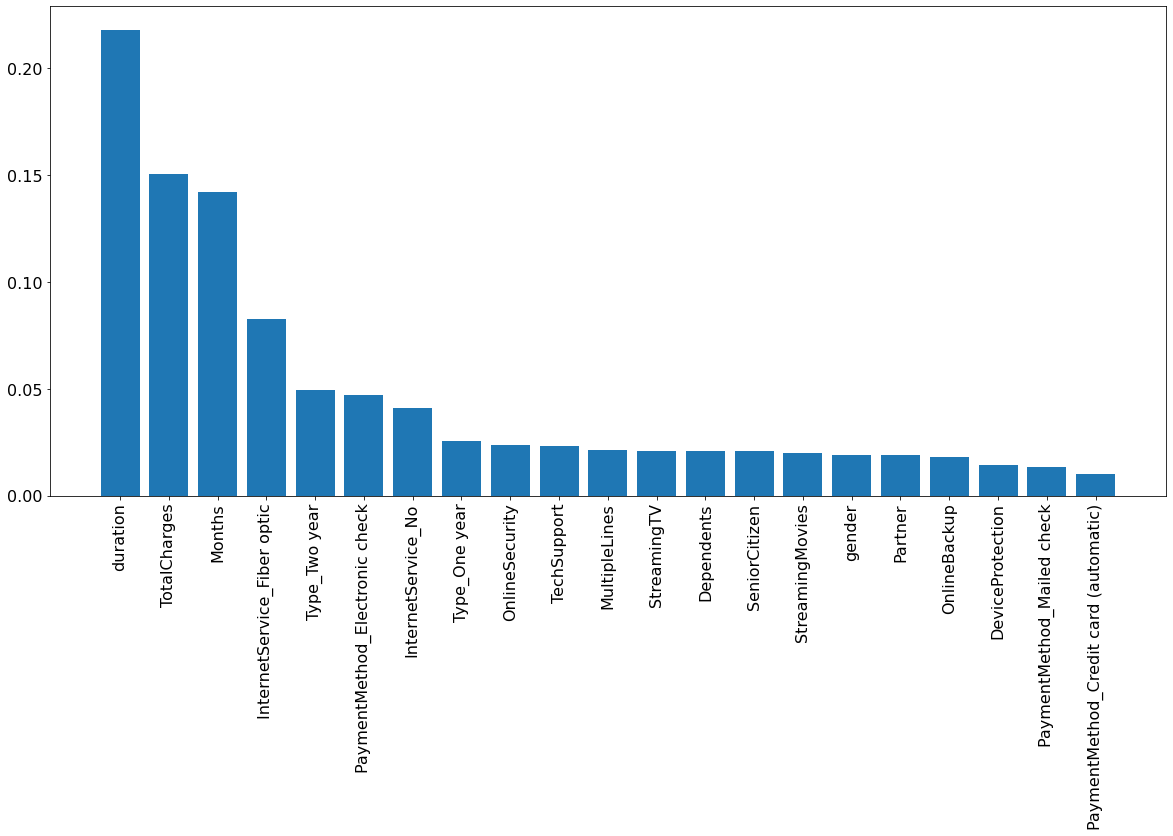

In [188]:
#Посмотрим на вес признаков каторые учитывает модель
feature_import = model_forest.feature_importances_
col_names = features_train.columns
indices = np.argsort(feature_import)[::-1]
print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, col_names[idx], feature_import[idx]))
d1 = pd.Series(data = feature_import, index =col_names  ).sort_values(ascending=False)
plt.figure(figsize=(20,9))
plt.bar(d1.index,d1.values)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=90);

CatBoostClassifier с подбором лучших параметров

In [189]:
classifier = CatBoostClassifier() 
hyperparams = [{'learning_rate':[0.1, 0.5, 0.8],
                'random_state':[12345],
                'verbose':[100, 200]}]

print('# Идет подбор гиперпараметров')
print()
clf = GridSearchCV(classifier, hyperparams)
clf.fit(features_train, target_train)
print('Лучшие гиперпараметры:')
print()
print(clf.best_params_)
print()

# Идет подбор гиперпараметров

0:	learn: 0.6240682	total: 2.84ms	remaining: 2.83s
100:	learn: 0.2941836	total: 208ms	remaining: 1.85s
200:	learn: 0.2298636	total: 417ms	remaining: 1.66s
300:	learn: 0.1892523	total: 621ms	remaining: 1.44s
400:	learn: 0.1587165	total: 827ms	remaining: 1.24s
500:	learn: 0.1368062	total: 1.03s	remaining: 1.03s
600:	learn: 0.1207717	total: 1.24s	remaining: 825ms
700:	learn: 0.1050241	total: 1.45s	remaining: 617ms
800:	learn: 0.0941615	total: 1.65s	remaining: 409ms
900:	learn: 0.0839484	total: 1.87s	remaining: 205ms
999:	learn: 0.0763813	total: 2.1s	remaining: 0us
0:	learn: 0.6277009	total: 2.45ms	remaining: 2.44s
100:	learn: 0.2964015	total: 265ms	remaining: 2.35s
200:	learn: 0.2305410	total: 469ms	remaining: 1.86s
300:	learn: 0.1870057	total: 671ms	remaining: 1.56s
400:	learn: 0.1587914	total: 881ms	remaining: 1.32s
500:	learn: 0.1356608	total: 1.09s	remaining: 1.08s
600:	learn: 0.1191608	total: 1.3s	remaining: 863ms
700:	learn: 0.1058928	total: 1.5s	remai

In [190]:
model_cat = CatBoostClassifier(verbose=100,
                           random_state=12345,
                           learning_rate=0.1)
model_cat.fit(features_train, target_train)
predicted_valid_cat = pd.Series(model_cat.predict(features_valid))
accuracy = accuracy_score(target_valid, predicted_valid_cat)
probabilities_valid = model_cat.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("| " "accuracy:", accuracy, "| " "AUC-ROC:", roc_auc) 

0:	learn: 0.6273078	total: 2.38ms	remaining: 2.38s
100:	learn: 0.2980664	total: 313ms	remaining: 2.79s
200:	learn: 0.2396649	total: 570ms	remaining: 2.26s
300:	learn: 0.1999115	total: 845ms	remaining: 1.96s
400:	learn: 0.1732497	total: 1.07s	remaining: 1.6s
500:	learn: 0.1519640	total: 1.3s	remaining: 1.3s
600:	learn: 0.1351660	total: 1.53s	remaining: 1.02s
700:	learn: 0.1225356	total: 1.78s	remaining: 758ms
800:	learn: 0.1107505	total: 2.01s	remaining: 499ms
900:	learn: 0.1007141	total: 2.25s	remaining: 248ms
999:	learn: 0.0918365	total: 2.52s	remaining: 0us
| accuracy: 0.872959545777147 | AUC-ROC: 0.9177176955194054


Feature importances:
 1. feature 'duration' (32.0517)
 2. feature 'TotalCharges' (16.1235)
 3. feature 'Months' (12.0882)
 4. feature 'InternetService_Fiber optic' (4.6035)
 5. feature 'gender' (3.8873)
 6. feature 'Type_Two year' (3.4437)
 7. feature 'Dependents' (3.1482)
 8. feature 'PaymentMethod_Electronic check' (2.5341)
 9. feature 'TechSupport' (2.2561)
10. feature 'MultipleLines' (2.1040)
11. feature 'SeniorCitizen' (1.9392)
12. feature 'InternetService_No' (1.9104)
13. feature 'OnlineBackup' (1.9029)
14. feature 'OnlineSecurity' (1.8596)
15. feature 'PaymentMethod_Mailed check' (1.7906)
16. feature 'Type_One year' (1.7808)
17. feature 'StreamingTV' (1.6159)
18. feature 'StreamingMovies' (1.4835)
19. feature 'Partner' (1.2219)
20. feature 'PaymentMethod_Credit card (automatic)' (1.1617)
21. feature 'DeviceProtection' (1.0930)


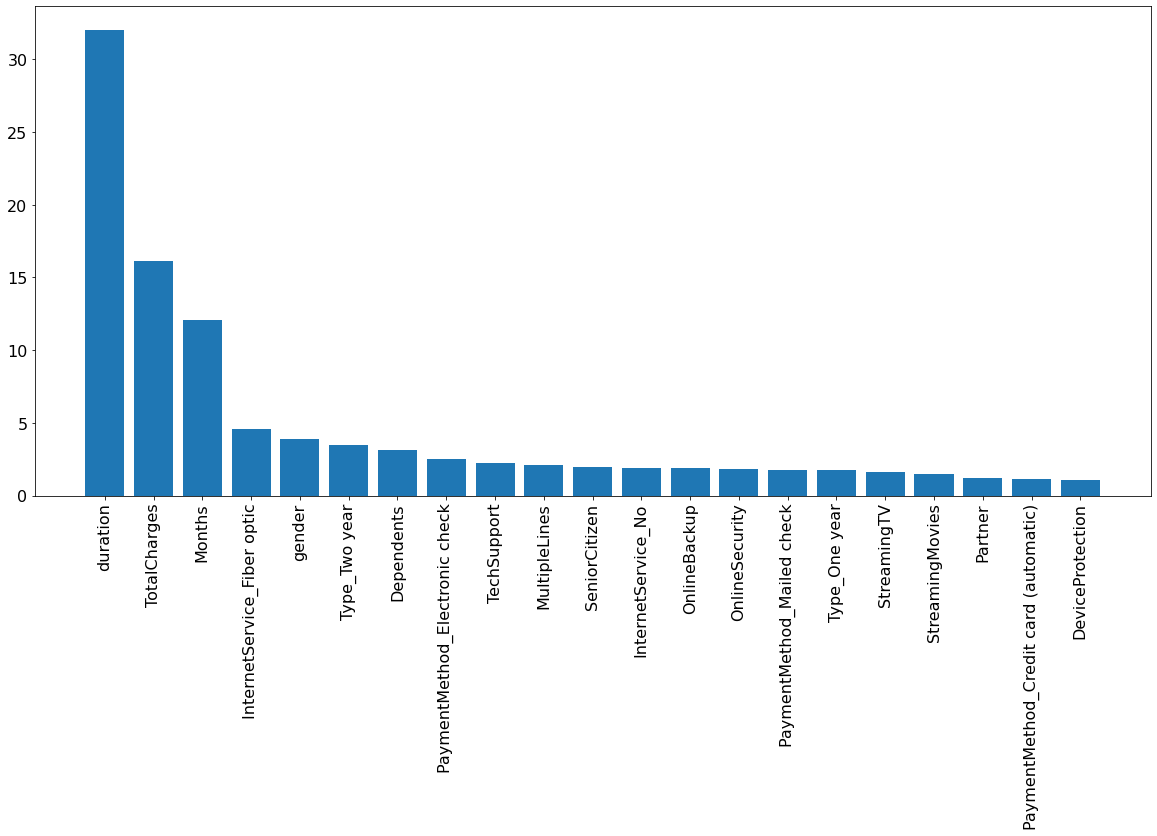

In [191]:
#Посмотрим на вес признаков каторые учитывает модель
feature_import_2 = model_cat.feature_importances_
col_names = features_train.columns
indices = np.argsort(feature_import_2)[::-1]
print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, col_names[idx], feature_import_2[idx]))
d1 = pd.Series(data = feature_import_2, index =col_names  ).sort_values(ascending=False)
plt.figure(figsize=(20,9))
plt.bar(d1.index,d1.values)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=90);

LGBMClassifier

In [192]:
model_LGMR = LGBMClassifier(learning_rate=0.1, 
                      num_leaves=200, 
                      random_state=12345)
model_LGMR.fit(features_train, target_train)
predicted_valid_LGMR = pd.Series(model_cat.predict(features_valid))
accuracy = accuracy_score(target_valid, predicted_valid_LGMR)
probabilities_valid = model_LGMR.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("| " "accuracy:", accuracy, "| " "AUC-ROC:", roc_auc) 

| accuracy: 0.872959545777147 | AUC-ROC: 0.8809588747788761


Feature importances:
 1. feature 'TotalCharges' (5880.0000)
 2. feature 'Months' (3220.0000)
 3. feature 'duration' (2085.0000)
 4. feature 'gender' (803.0000)
 5. feature 'PaymentMethod_Electronic check' (646.0000)
 6. feature 'Partner' (471.0000)
 7. feature 'StreamingTV' (389.0000)
 8. feature 'MultipleLines' (385.0000)
 9. feature 'OnlineBackup' (378.0000)
10. feature 'DeviceProtection' (368.0000)
11. feature 'Dependents' (342.0000)
12. feature 'StreamingMovies' (302.0000)
13. feature 'OnlineSecurity' (298.0000)
14. feature 'SeniorCitizen' (297.0000)
15. feature 'PaymentMethod_Mailed check' (263.0000)
16. feature 'PaymentMethod_Credit card (automatic)' (257.0000)
17. feature 'TechSupport' (240.0000)
18. feature 'InternetService_Fiber optic' (231.0000)
19. feature 'Type_One year' (195.0000)
20. feature 'Type_Two year' (160.0000)
21. feature 'InternetService_No' (106.0000)


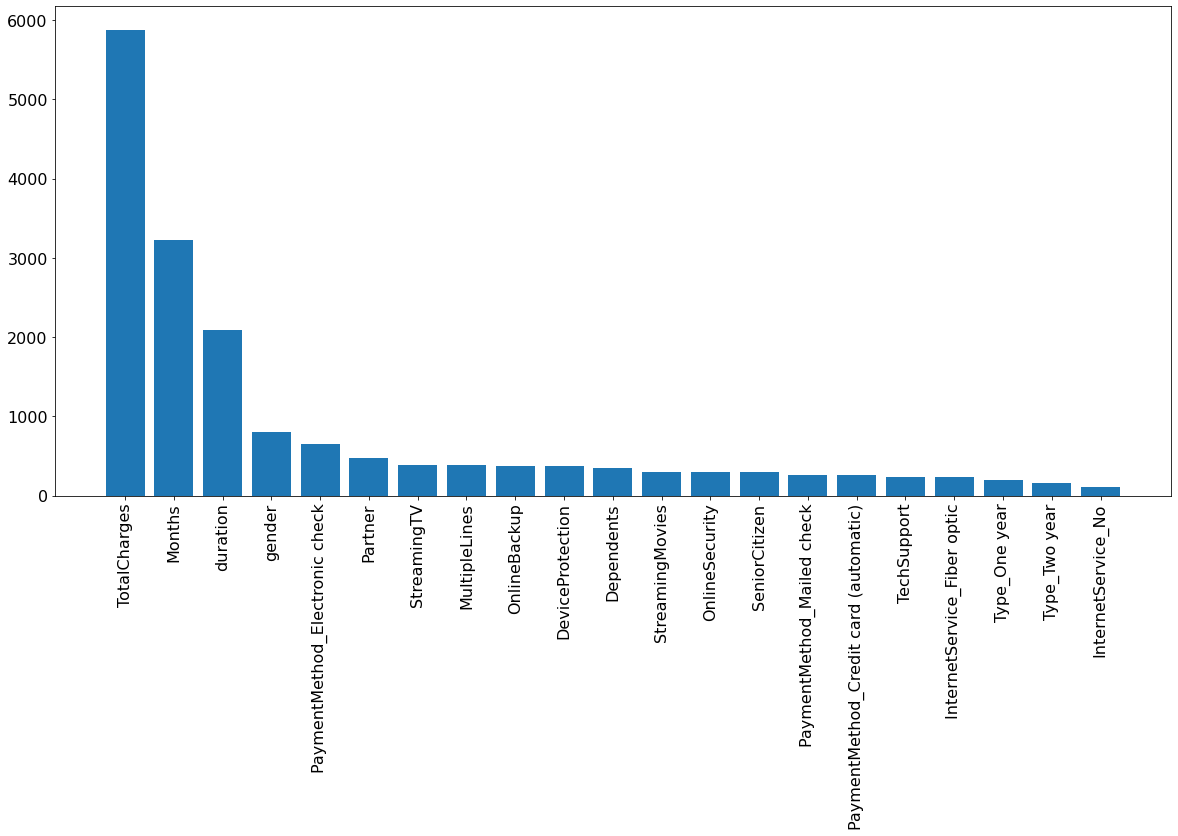

In [193]:
#Посмотрим на вес признаков каторые учитывает модель
feature_import_3 = model_LGMR.feature_importances_
col_names = features_train.columns
indices = np.argsort(feature_import_3)[::-1]
print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, col_names[idx], feature_import_3[idx]))
d1 = pd.Series(data = feature_import_3, index =col_names  ).sort_values(ascending=False)
plt.figure(figsize=(20,9))
plt.bar(d1.index,d1.values)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=90);

Вывод: Модели по разному оценивают значения параметров. Для RandomForest и CatBoostClassifier важнейшим параметром является duration. А для LGBMClassifier этот параметр только на третьем месте. Лучшее результат на обучаюшей выборке показала модель CatBoostClassifier(ROC-AUC = 0.9177). Проверим модели на тестовой выборке и объединим результаты в итоговую таблицу.

 **Шаг 4: Тестирование моделей**

In [194]:
lr_ROC = roc_auc_score(target_test, model_lr.predict_proba(features_test)[:, 1])
print('ROC-AUC модели LogisticRegression на тестовой выборке:', lr_ROC)

ROC-AUC модели LogisticRegression на тестовой выборке: 0.8212384584605879


In [195]:
dt_ROC = roc_auc_score(target_test, model_dt.predict_proba(features_test)[:, 1])
print('ROC-AUC модели DecisionTree на тестовой выборке:', dt_ROC)

ROC-AUC модели DecisionTree на тестовой выборке: 0.6738448330876878


In [196]:
model_rf_test = RandomForestClassifier(n_estimators=41, max_depth=10, random_state=12345)
model_rf_test.fit(features_train, target_train)
probabilities_valid = model_rf_test.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
rf_ROC = roc_auc_score(target_test, probabilities_one_valid)
print("ROC-AUC модели RandomForest на тестовой выборке:'", rf_ROC)

ROC-AUC модели RandomForest на тестовой выборке:' 0.8373333029442005


In [197]:
cat_ROC = roc_auc_score(target_test, model_cat.predict_proba(features_test)[:, 1])
print('ROC-AUC модели CatBoost на тестовой выборке:', cat_ROC)

ROC-AUC модели CatBoost на тестовой выборке: 0.904838962920193


In [198]:
LGMR_ROC = roc_auc_score(target_test, model_LGMR.predict_proba(features_test)[:, 1])
print('ROC-AUC модели LGMR на тестовой выборке:', LGMR_ROC)

ROC-AUC модели LGMR на тестовой выборке: 0.8730114111193836


In [199]:
results = {
    'Model' : ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'CatBoostClassifier', 'LGBMClassifier'],
    'ROC-AUC' :pd.Series([lr_ROC, dt_ROC, rf_ROC, cat_ROC, LGMR_ROC])
    }
display(pd.DataFrame(results))

,Model,ROC-AUC
0,LogisticRegression,0.821238
1,DecisionTreeClassifier,0.673845
2,RandomForestClassifier,0.837333
3,CatBoostClassifier,0.904839
4,LGBMClassifier,0.873011


Вывод: Я обучил несколько моделей и проверили их качество с помощью метрики ROC-AUC. Лучше всего с задачей прогнозирования оттока клиентов справилась модель CatBoostClassifier с подбором гиперпараметров, которая показывает очень высокие значения метрики как на тренировочной(AUC-ROC = 0.9177) так и на тестовой выборке(AUC-ROC = 0.9048)

# Ответы на вопросы:

### Какие пункты плана были выполнены, а какие — нет (поясните почему)?

- Первый пункт - загрузка данный, их первичный анализ. Проверка па наличие пропусков и дубликатов.

- Второй пункт - предобработка данных, объединение данных в общую таблицу. Приведение данных к нужным форматам. Добавление дополнительных признаков.

- Третий пункт -  исследовательский анализ данных. Посмотрел, на распределение количества новых клиентов по годам, их ежемесячные затраты. Выделил в отдельную таблицу клиентов, которые ушли. Попытался определить причины по которым они могли это сделать. Проверил какими услугами пользовались ушедшие пользователи

- Четвертыи и пятый пункты - Подготовка и обучение моделей. Были определены признаки и целевой признак. Закодированы категориальные признаки. Выборки разбиты на обучающую, валидационную и тестовую. Обучены пять моделей.
- Шестой пункт - тестирование моделей и общей вывод 

### Какие трудности возникли и как вы их преодолели?

Главной проблемой было понять какой признак может стать целевым. Сначала я думал что возможно использовать напряму End Date но столкнулся с проблемой утечки. Вообще в данной задаче нужно было быть очень осторожно с признаками. Использование части из них могло привести к утечке и переобучению моделей. Поэтому я удалил часть признаков и создал целевой признак out. который определял ущёл клиент или нет.

### Какие ключевые шаги в решении задачи выделили?

Как я уже писал выше ключевой шаг это создание дополнительных признаков : duration (длительность контракта на 2020-01-01) и выделение out из EndDate.
Удаление признаков, которые могли переобучить модель.
Настройка гиперпараметров.


### Какая ваша итоговая модель и какое у неё качество?

Моя итоговая модель CatBoostClassifier с такими гиперпараметрами {'learning_rate': 0.1, 'random_state': 12345, 'verbose': 100}. Её ROC-AUC на тестовой выборке 0.904839